In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import imblearn

In [2]:
import pandas as pd
# reading csv files
dataset =  pd.read_csv('transfusion.data', sep=",")
print(dataset)

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  


In [3]:
dataset. shape

(748, 5)

In [4]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
dataset.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
dataset.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

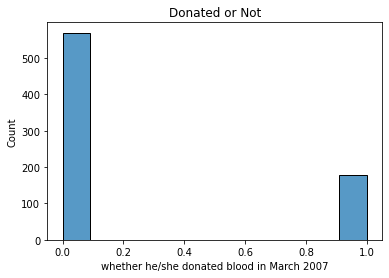

In [9]:
sns.histplot(data =dataset, x = "whether he/she donated blood in March 2007")
#sns.histplot(dataset.whether he/she donated blood in March 2007)
plt.title("Donated or Not")
plt.show()

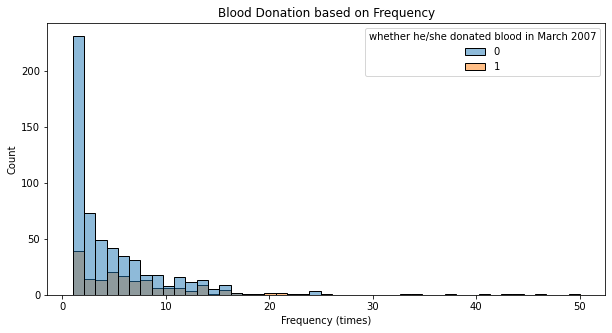

In [10]:
plt.figure(figsize=(10,5))
plt.title("Blood Donation based on Frequency")
sns.histplot(x="Frequency (times)", hue="whether he/she donated blood in March 2007", data=dataset)
plt.show()

In [11]:
X = dataset.iloc[:,[0,1,2,3]].values
y = dataset.iloc[:,4].values

In [12]:
#Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [13]:
#Standardisation/Normalization of the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [14]:
# Fitting K-NN to the Training Set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric = "minkowski", p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [15]:
# Predicting the test set result
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0]


In [16]:
print(y_test)

[0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0]


In [17]:
#evaluation of model performance

from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n' % (acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print("confusion Matrix:")
print(cm, "\n\n")
print("---------------------------------------")
result = metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.75


confusion Matrix:
[[149  15]
 [ 42  19]] 


---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       164
           1       0.56      0.31      0.40        61

    accuracy                           0.75       225
   macro avg       0.67      0.61      0.62       225
weighted avg       0.72      0.75      0.72       225



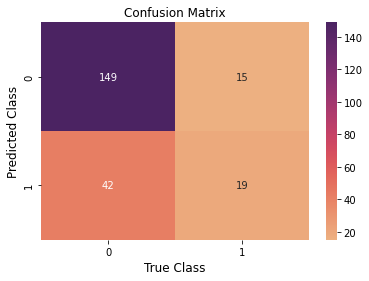

In [18]:
ax = sns.heatmap(cm, cmap= 'flare', annot=True, fmt='d')
plt.title("Confusion Matrix", fontsize=12)
plt.ylabel("Predicted Class", fontsize=12)
plt.xlabel("True Class", fontsize=12)
plt.show()